## Maszynowa analiza danych 2022/2023
### Laboratorium 5
### Analiza głównych składowych
Antoni Perużyński \\
Informatyka Stacjonarne \\

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotnine import *

import seaborn as sb

## Przykład redukcji liczby predykatorów

In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#### Wczytanie danych

In [ ]:
satysf= pd.read_csv('wina.csv', sep = ',', decimal = '.')
satysf 
X = satysf[satysf.columns[:-1]]
y = satysf[satysf.columns[-1]]

#### Standaryzacja

In [ ]:
sc_Stand = StandardScaler()
X = sc_Stand.fit_transform(X)

#### Macierz korelacji

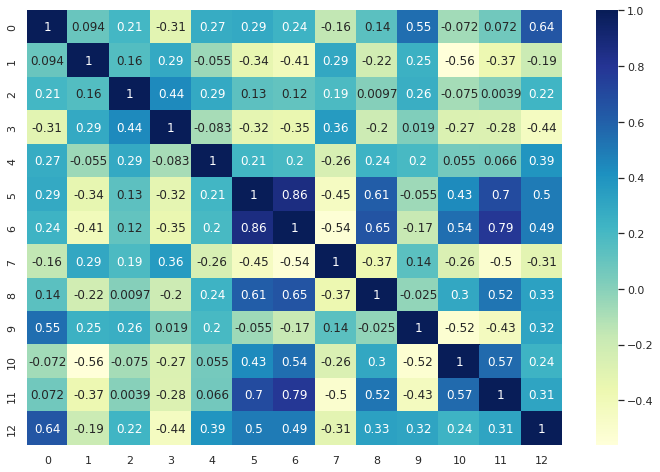

In [ ]:
sb.set(rc = {'figure.figsize':(12,8)})
sb.heatmap(pd.DataFrame(X).corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

Stworzyłem macierz korelacji dla wyjściowych zmiennych, żeby spojrzeć, czy są jakieś zmienne, które są ze sobą mocno skorelowane (w sposób liniowy). I tak na przykład dość mocno skorelowane są ze sobą zmienna 5 i 6., a także 11 i 6. Wartości współczynnika korelacji, co do modułu >0.75.

### Oryginalny zestaw cech (predykatorów)

#### Podział na zbiór uczący i treningowy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Redukcja przestrzeni cech

In [ ]:
pca = PCA().fit(X)

X_PCA = pca.transform(X)

## 2 składowe

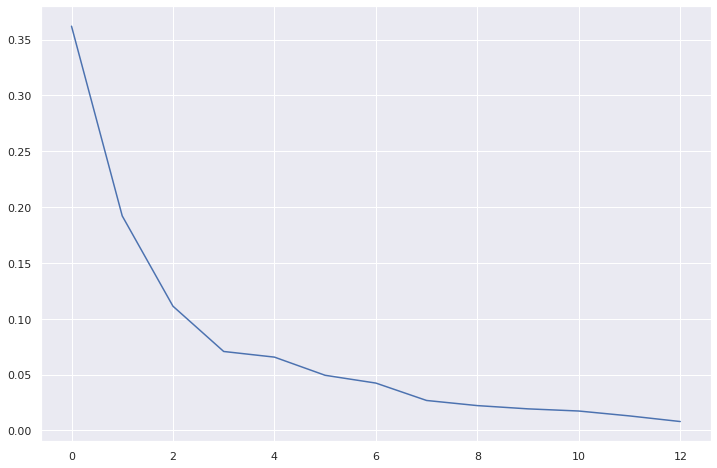

In [ ]:
  plt.plot(pca.explained_variance_ratio_)
  
  licz_pc = 2
  ladunki = pca.components_[:licz_pc].T
  skladowe = ["PC"+str(i) for i in range(1, licz_pc+1)]
  ladunki_df = pd.DataFrame(ladunki, columns = skladowe,
                          index=satysf.columns[:-1])

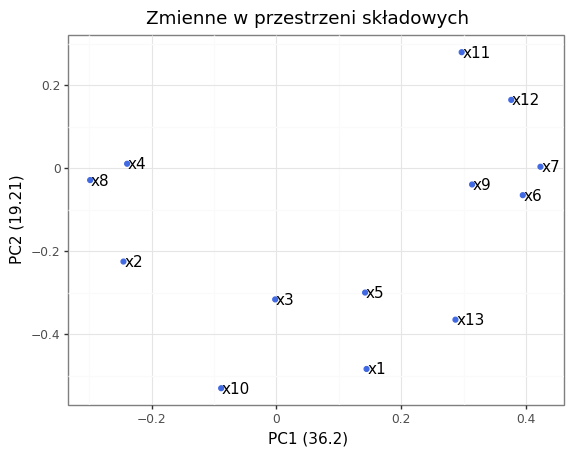

In [ ]:
  print((ggplot(ladunki_df, aes('PC1', 'PC2')) +
  geom_point(color = "royalblue") +
  theme_bw() +
  geom_text(label = ladunki_df.index, ha='left', nudge_x = 0.001) +
  labs(x = f'PC1 ({round(pca.explained_variance_ratio_[0]*100, 2)})',
      y = f'PC2 ({round(pca.explained_variance_ratio_[1]*100, 2)})',
      title = 'Zmienne w przestrzeni składowych')
  #xlim(0.37,0.47)
  ))

Na powyższym wykresie, można spróbować (dla różnych składowych głównych) znaleźć czy są jakieś dwie składowe główne, które idealnie dzielą wyjaśnianie zmiennych podstawowych. Jednakże w celu sprawdzenia wszystkich par musielibyśmy wykonać w tym przypadku 13 po 2 wykresów tzn. 13*12/2.

W celu łatwiejszej interpretacji wizualnej powyższego wykresu, można by przyjąc wspólne min oraz max na osi. Ponieważ teraz, możemy mieć zafałszowany obraz, czy np. zmienna x13, ma bliżej do Osi PC1 czy PC2. (Trzeba by zaznaczyć mocniej środek układu współrzędnych oraz przyjąć takie same przedziały dla każdej osi.)

In [ ]:
ladunki_df

,PC1,PC2
x1,0.144329,-0.483652
x2,-0.245188,-0.224931
x3,-0.002051,-0.316069
x4,-0.239320,0.010591
x5,0.141992,-0.299634
x6,0.394661,-0.065040
x7,0.422934,0.003360
x8,-0.298533,-0.028779
x9,0.313429,-0.039302
x10,-0.088617,-0.529996


In [ ]:
X_PCA_train_List = []
X_PCA_test_List = []
y_PCA_train_List = []
y_PCA_test_List = []

for i in range(1,14):
  licz_pc = i

  X_PCA2 = X_PCA[:,0:licz_pc ]
  X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA2, y, test_size=0.30)
  
  X_PCA_train_List.append(X_PCA_train)
  X_PCA_test_List.append(X_PCA_test)
  y_PCA_train_List.append(y_PCA_train)
  y_PCA_test_List.append(y_PCA_test)

W komórce powyżej zostały stworzone listy, które zawierają odpowiednie podzbiory służące do klasyfikacji oraz sprawdzenia jakości klasyfikatorów w zależności od ilości wybranych składowych.

### DecisionTreeClassifier

In [ ]:
dtc1 = DecisionTreeClassifier()
dtc1.fit(X_train, y_train)
y_pred = dtc1.predict(X_test)
#print(confusion_matrix(y_test, y_pred))
print("DTC for original data")
print(classification_report(y_test, y_pred))

for i in range(0,13):
  print("DTC for PCA", i+1)
  dtcPCA = DecisionTreeClassifier()
  dtcPCA.fit(X_PCA_train_List[i], y_PCA_train_List[i])
  y_PCA2_pred = dtcPCA.predict(X_PCA_test_List[i])
  #print(confusion_matrix(y_PCA2_test, y_PCA2_pred))
  print(classification_report(y_PCA_test_List[i], y_PCA2_pred))

DTC for original data
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       0.96      0.92      0.94        25
           3       0.92      0.92      0.92        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.94      0.94      0.94        54

DTC for PCA 1
              precision    recall  f1-score   support

           1       0.71      0.71      0.71        21
           2       0.59      0.50      0.54        20
           3       0.75      0.92      0.83        13

    accuracy                           0.69        54
   macro avg       0.68      0.71      0.69        54
weighted avg       0.68      0.69      0.68        54

DTC for PCA 2
              precision    recall  f1-score   support

           1       0.94      0.83      0.88        18
           2       0.83      0.95      0.89        21
           3       1.00  

Analizujac powyższe wyniki można wyczytać, że dokładność dla wyjściowego zbioru danych wynosi: 0.94. W momencie, gdy modelowalibysmy dane tylko 1 główną składową, to utracimy aż 0.25 (25 punktów procentowych w stosunku do zbioru wyjściowego.) Jednakże, już przy dwóch zmiennych otrzymujemy dokładnośc na poziomie 0.91. Natomiast przy 4 głównych składowych mamy większą dokładność, niż w wyjściowym zbiorze danych bo wynoszącą: 0.96. Sprawdźmy ile % łącznej wariancji wyjaśniają 4 składowe.


In [ ]:
#pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [ ]:
np.cumsum(pca.explained_variance_ratio_[:4])[3]*100

73.59899907589926

4 pierwsze składowe wyjaśniają 73.6%, także tracimy 26% wyjaśnianych danych, ale dokładność dopasowania jest lepsza oraz redukujemy znacząco ilość zmiennych.

Wyższą wartość dostajemy dopiero przy wyorzystaniu 13 składowych. Jednakże celem zasotosowania PCA jest redukcja wymiarów, także taka ilość składowych nie daje nam porządanych efektów.

Pojawiło mi się pewne pytanie i niepewność dotycząca sposobu weryfikacji skuteczności redukcji. Zastanawia mnie czy przeprowadzenie algorytmu PCA nie ma za zadanie wyjaśnienia jak największej ilości wariancji? I rozumiem, że musimy znaleźć jakiś sposób weryfikacji, czy redukcja jest odpowiednia. Jednakże w literaturze znalazłem, że do wykonania redukcji w celu odpowiedniego rozdzielenia klas stosuje się Analize Dyskryminacji. Chciałbym to jeszcze przedyskutować w trakcie zajęć lub konsultacji.   

### GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
#print(confusion_matrix(y_test, y_pred))
print("GNB for original data")
print(classification_report(y_test, y_pred))


for i in range(0,13):
  print("GNB for PCA", i+1)
  gnbPCA = DecisionTreeClassifier()
  gnbPCA.fit(X_PCA_train_List[i], y_PCA_train_List[i])
  y_PCA2_pred = gnbPCA.predict(X_PCA_test_List[i])
  #print(confusion_matrix(y_PCA2_test, y_PCA2_pred))
  print(classification_report(y_PCA_test_List[i], y_PCA2_pred))

GNB for original data
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       1.00      0.88      0.94        25
           3       0.87      1.00      0.93        13

    accuracy                           0.94        54
   macro avg       0.94      0.96      0.94        54
weighted avg       0.95      0.94      0.94        54

GNB for PCA 1
              precision    recall  f1-score   support

           1       0.71      0.71      0.71        21
           2       0.59      0.50      0.54        20
           3       0.75      0.92      0.83        13

    accuracy                           0.69        54
   macro avg       0.68      0.71      0.69        54
weighted avg       0.68      0.69      0.68        54

GNB for PCA 2
              precision    recall  f1-score   support

           1       0.94      0.83      0.88        18
           2       0.83      0.95      0.89        21
           3       1.00  

Wykorzystując Naiwny Klasyfikatora Bayesa możemy odczytać, że najlepsza wartość dokładności klasyfikacji wynosci 0.98 i jest ona osignięta dla 3 oraz 13 składowych. Tym razem wybrałbym 3 składowe, które wyjaśniają 65.53% wariancji bazowych zmiennych.

In [ ]:
np.cumsum(pca.explained_variance_ratio_[:3])[2]*100

66.52996889318523

### KNeighborsClassifier

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)
#print(confusion_matrix(y_test, y_pred))
print("KNN for original data")
print(classification_report(y_test, y_pred))


for i in range(0,13):
  print("KNN for PCA", i+1)
  knnPCA = KNeighborsClassifier()
  knnPCA.fit(X_PCA_train_List[i], y_PCA_train_List[i])
  y_PCA2_pred = knnPCA.predict(X_PCA_test_List[i])
  #print(confusion_matrix(y_PCA2_test, y_PCA2_pred))
  print(classification_report(y_PCA_test_List[i], y_PCA2_pred))

KNN for original data
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       1.00      0.88      0.94        25
           3       0.87      1.00      0.93        13

    accuracy                           0.94        54
   macro avg       0.94      0.96      0.94        54
weighted avg       0.95      0.94      0.94        54

KNN for PCA 1
              precision    recall  f1-score   support

           1       0.89      0.76      0.82        21
           2       0.74      0.85      0.79        20
           3       0.92      0.92      0.92        13

    accuracy                           0.83        54
   macro avg       0.85      0.84      0.84        54
weighted avg       0.84      0.83      0.83        54

KNN for PCA 2
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        18
           2       0.95      0.95      0.95        21
           3       1.00  

Wykorzystując algorytm KNN najlepsze wartości dokładności są dla 5, 6 oraz 13 składowych. Nie dużo gorsze wyniki otrzymujemy już dla dwóch pierwszych składowych. Tutaj wybór zależałby od tego, czy ważniejsza jest dla nas dokładność czy zredukowanie ilości zmiennych (co za tym idzie zmniejszenie potrzebnej mocy obliczeniowej i czasu). W medycynie może ważniejsza być dla nas dokładność nawet jej zwiększenie o te 2 punkty procentowe, kosztem mocy obliczeniowej. Ale czasem ważniejszy będzie czas wykonania. 

Należy jednak pamiętać, że nasz zbiór danych jest małym zbiorem danych w celu trennowania klasyfikatora oraz sprawdzenia klasyfikacji. Możnaby również dla wszystkich algorytmów sprawdzić ich podstawy teoretyczne i posprawdzać założenia dotyczące tych algorytmów. 
